In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [4]:
df = pd.read_csv('/Users/rosmebabyjoseph/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv',index_col='customerID')
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
df.describe(include=object)

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7043    7043       7043         7043          7043            7043   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3555    3641       4933         6361          3390            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7043            7043             7043              7043   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2785            3875             4171              2365   

       TotalCharges Churn  
count          7043  7043  
unique         6531     2  
top                    No  
freq             11  5174

In [9]:
df.isna().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
df[df['TotalCharges'].isna()]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [12]:
# We need to convert the Total Charges from object type to Numeric
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [14]:
df_categorical = df.select_dtypes(include=object)
column_categorical = df_categorical.columns

In [15]:
df_categorical.head()

gender Partner Dependents PhoneService     MultipleLines  \
customerID                                                             
7590-VHVEG  Female     Yes         No           No  No phone service   
5575-GNVDE    Male      No         No          Yes                No   
3668-QPYBK    Male      No         No          Yes                No   
7795-CFOCW    Male      No         No           No  No phone service   
9237-HQITU  Female      No         No          Yes                No   

           InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies        Contract  \
customerID                                                           
7590-VHVEG          No          No              No  Month-to-month   
5575-GNVDE          No          No              No        One year   
3668-QPYBK          No          No              No  Month-to-month   
7795-CFOCW         Yes          No              No        One year   
9237-HQITU          No          No              No  Month-to-month   

           PaperlessBilling              PaymentMethod Churn  
customerID                                                    
7590-VHVEG              Yes           Electronic check    No  
5575-GNVDE               No               Mailed check    No  
3668-QPYBK              Yes               Mailed check   Yes  
7795-CFOCW               No  Bank transfer (automatic)    No  
9237-HQITU              Yes           Electronic check   Yes

In [16]:
df_numerical = df.select_dtypes(include=np.float)
column_numerical = df_numerical.columns
df_numerical.head()

MonthlyCharges  TotalCharges
customerID                              
7590-VHVEG           29.85         29.85
5575-GNVDE           56.95       1889.50
3668-QPYBK           53.85        108.15
7795-CFOCW           42.30       1840.75
9237-HQITU           70.70        151.65

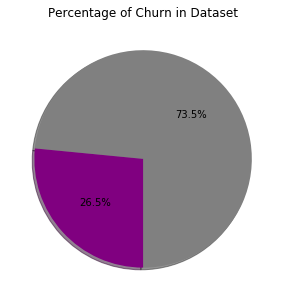

In [22]:
# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
explode = (0, 0.1, 0, 0)  
labels = ['Yes', 'No']
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [24]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines    No  No phone service   Yes
PhoneService                               
No                0               682     0
Yes            3390                 0  2971

In [25]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV        No  No internet service   Yes
InternetService                                 
DSL              1464                    0   957
Fiber optic      1346                    0  1750
No                  0                 1526     0

In [26]:
def convert_no_service (df):
col_to_transform = []
for col in df.columns:
    if (df[col].dtype == 'O') & (col != 'customerid'):
        if len(df[df[col].str.contains("No")][col].unique()) > 1:
            col_to_transform.append(col)

print("Total column(s) to transform: {}".format(col_to_tr
ansform))
for col in col_to_transform:
df.loc[df[col].str.contains("No"), col] = 'No'
return df

IndentationError: expected an indented block (<ipython-input-26-2c65a00368cf>, line 2)